In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [13]:
data = "/Users/abdoul-baki/Desktop/sales"

In [14]:
os.listdir(data)

['sales.ipynb',
 'Sales_December_2019.csv',
 '.DS_Store',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 '.ipynb_checkpoints',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [15]:
janvier_sales = pd.read_csv(os.path.join(data, "Sales_January_2019.csv"))

In [16]:
janvier_sales.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [17]:
decembre_sales = pd.read_csv(os.path.join(data, "Sales_December_2019.csv"))

In [18]:
decembre_sales.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [19]:
#merge data

files = [fichier for fichier in os.listdir(data) if fichier.endswith('.csv')]

In [20]:
files 

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [24]:
# Initialize an empty DataFrame
df = pd.DataFrame()

In [25]:
# Assuming 'files' is a list of file names
for file in files:
    file_path = os.path.join(data, file)
    data_interm = pd.read_csv(file_path)
    df = pd.concat([df, data_interm], ignore_index=True)

In [86]:
#### data

In [26]:
df.shape

(186850, 6)

In [27]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [28]:
df.isnull().sum(axis=0)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [29]:
#Affiche le df avec toutes les lignes qui ont au moins une valeur manquante
val_manquantes = df[df.isnull().any(axis=1)]
val_manquantes

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#Est-ce que toutes les lignes n'ont que des valeurs manquantes
val_manquantes.isnull().all()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [31]:
#Supprimer toutes les lignes avec des valeurs manquantes:
df.dropna(inplace=True)

In [32]:
df.shape

(186305, 6)

In [33]:
df.isnull().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [34]:
#Débarassons-nous des lignes avec des valeurs abérantes
df[df['Order Date'] == "Order Date"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
183671,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184012,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184041,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184275,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [35]:
df_clean = df.drop(df[df['Order Date'] == "Order Date"].index)

In [36]:
df_clean.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001"
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035"
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001"
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001"
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001"


In [37]:
df_clean.loc[~df_clean['Order ID'].str.isdigit(), : ]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [38]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [39]:
df_clean['Quantity Ordered'] = df_clean['Quantity Ordered'].astype('int')

In [40]:
df_clean['Price Each'] = pd.to_numeric(df_clean['Price Each'])

In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


In [42]:
# Vérifier les valeurs nulles
null_values = df_clean['Order Date'].isnull()

In [43]:
print(df_clean['Order Date'].head())

0    12/30/19 00:01
1    12/29/19 07:03
2    12/12/19 18:21
3    12/22/19 15:13
4    12/18/19 12:38
Name: Order Date, dtype: object


In [44]:
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


In [45]:
# Par exemple, remplir les valeurs nulles avec une date fictive :
df_clean['Order Date'].fillna('1900-01-01', inplace=True)

In [46]:
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])

In [47]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [48]:
df['Order Date'].head(5)

0    12/30/19 00:01
1    12/29/19 07:03
2    12/12/19 18:21
3    12/22/19 15:13
4    12/18/19 12:38
Name: Order Date, dtype: object

In [49]:
# Analyse Exploratoire proprement dite
#Quel est le meilleur mois de vente ? et Quel est le chiffre d'affaires de ce mois ?

In [50]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


In [51]:
df_clean.index

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       186840, 186841, 186842, 186843, 186844, 186845, 186846, 186847, 186848,
       186849],
      dtype='int64', length=185950)

In [52]:
df_clean  = df_clean.set_index('Order Date')

In [53]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-12-30 00:01:00,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001"
2019-12-29 07:03:00,295666,LG Washing Machine,1,600.00,"562 2nd St, New York City, NY 10001"
2019-12-12 18:21:00,295667,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001"
2019-12-22 15:13:00,295668,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016"
2019-12-18 12:38:00,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301"


In [54]:
df_clean.sort_index(inplace=True)

In [55]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001"
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016"
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001"
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001"
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301"


In [56]:
df_clean['Month'] = df_clean.index.month_name()

In [57]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month
Order Date,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January


In [58]:
df_clean['chiffre_daffaire'] = df_clean['Quantity Ordered'] * df_clean['Price Each']

In [59]:
df_clean.sample(20)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire
Order Date,,,,,,,
2019-10-18 17:48:00,265537,Wired Headphones,1,11.99,"811 River St, New York City, NY 10001",October,11.99
2019-11-22 22:30:00,289134,ThinkPad Laptop,1,999.99,"533 Cherry St, San Francisco, CA 94016",November,999.99
2019-02-25 01:05:00,160370,Apple Airpods Headphones,1,150.00,"851 North St, San Francisco, CA 94016",February,150.00
2019-06-18 23:56:00,212693,iPhone,1,700.00,"603 West St, Seattle, WA 98101",June,700.00
2019-02-06 10:00:00,152841,ThinkPad Laptop,1,999.99,"762 14th St, San Francisco, CA 94016",February,999.99
2019-08-28 22:38:00,238224,27in FHD Monitor,1,149.99,"499 Walnut St, Portland, ME 04101",August,149.99
2019-05-15 13:24:00,197681,Macbook Pro Laptop,1,1700.00,"270 6th St, New York City, NY 10001",May,1700.00
2019-10-29 00:32:00,267823,ThinkPad Laptop,1,999.99,"609 Sunset St, San Francisco, CA 94016",October,999.99
2019-05-08 10:20:00,194540,USB-C Charging Cable,1,11.95,"498 Washington St, Seattle, WA 98101",May,11.95


In [60]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().sort_values(ascending=False)

Month
December     4613443.34
October      3736726.88
April        3390670.24
November     3199603.20
May          3152606.75
March        2807100.38
July         2647775.76
June         2577802.26
August       2244467.88
February     2202022.42
September    2097560.13
January      1822256.73
Name: chiffre_daffaire, dtype: float64

In [61]:
order = ["January", "February", "March", "April", "May", "June", "July", "August",
                  "September", "October", "November", "December"]

In [62]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().loc[order]

Month
January      1822256.73
February     2202022.42
March        2807100.38
April        3390670.24
May          3152606.75
June         2577802.26
July         2647775.76
August       2244467.88
September    2097560.13
October      3736726.88
November     3199603.20
December     4613443.34
Name: chiffre_daffaire, dtype: float64

Text(0.5, 1.0, "Chiffre d'affaire global par mois")

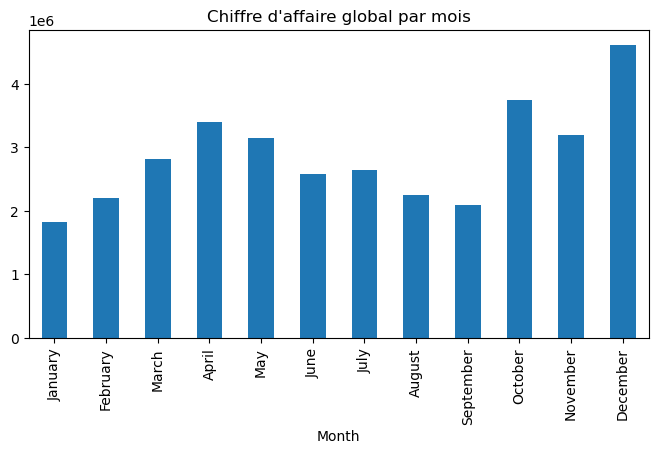

In [63]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().loc[order].plot.bar(figsize=(8, 4))
plt.title("Chiffre d'affaire global par mois")

In [64]:
df_clean.groupby('Month').sum()["chiffre_daffaire"].sort_values(ascending=False).December

4613443.34

In [65]:
#Dans quelle ville a-t-on le plus vendu de produits ?

In [66]:
df_clean['Purchase Address'].unique()

array(['9 Lake St, New York City, NY 10001',
       '760 Church St, San Francisco, CA 94016',
       '735 5th St, New York City, NY 10001', ...,
       '731 7th St, New York City, NY 10001',
       '754 Hickory St, New York City, NY 10001',
       '657 Spruce St, New York City, NY 10001'], dtype=object)

In [67]:
def get_ville(addresse):
  return addresse.split(',')[1].strip()

In [68]:
get_ville("760 Church St, San Francisco, CA 94016")

'San Francisco'

In [69]:
df_clean['ville'] = df_clean['Purchase Address'].apply(get_ville)

In [70]:
df_clean.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville
Order Date,,,,,,,,
2019-10-03 14:26:00,265702,27in FHD Monitor,1,149.99,"892 Church St, Atlanta, GA 30301",October,149.99,Atlanta
2019-03-21 10:07:00,164963,Wired Headphones,1,11.99,"801 Center St, Seattle, WA 98101",March,11.99,Seattle
2019-11-29 22:21:00,293085,AAA Batteries (4-pack),2,2.99,"607 4th St, New York City, NY 10001",November,5.98,New York City
2019-08-25 14:38:00,246473,34in Ultrawide Monitor,1,379.99,"798 Hill St, Atlanta, GA 30301",August,379.99,Atlanta
2019-03-24 12:02:00,166021,USB-C Charging Cable,1,11.95,"661 Wilson St, Atlanta, GA 30301",March,11.95,Atlanta


In [71]:
df_clean['ville'].unique()

array(['New York City', 'San Francisco', 'Dallas', 'Atlanta', 'Boston',
       'Seattle', 'Los Angeles', 'Portland', 'Austin'], dtype=object)

In [72]:
df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False)

ville
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: chiffre_daffaire, dtype: float64

<Axes: ylabel='ville'>

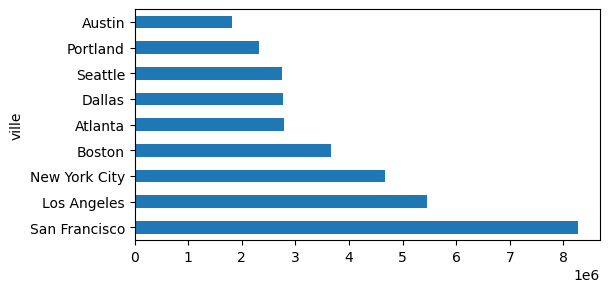

In [73]:
df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False).plot.barh(figsize=(6, 3))

In [74]:
ca_by_ville = df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False)

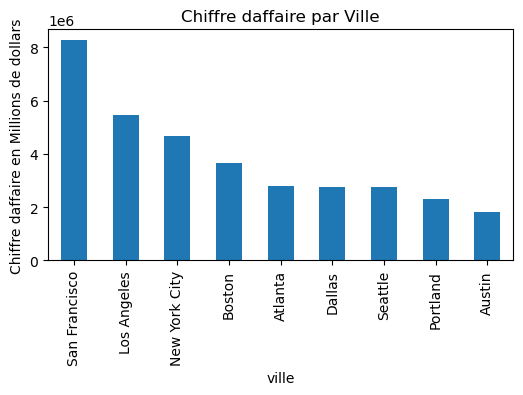

In [75]:
ca_by_ville.plot(kind='bar', figsize=(6, 3))
plt.ylabel('Chiffre daffaire en Millions de dollars')
plt.title('Chiffre daffaire par Ville')
plt.show()

In [76]:
#A quelle heure on vend le plus ?

In [77]:
df_clean['heure'] = df_clean.index.hour
df_clean['time'] = df_clean.index.time

In [78]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


In [79]:
df_clean.groupby('heure')['chiffre_daffaire'].sum().sort_values(ascending=False)

heure
19    2412938.54
12    2316821.34
11    2300610.24
20    2281716.24
18    2219348.30
13    2155389.80
17    2129361.61
14    2083672.73
21    2042000.86
10    1944286.77
15    1941549.60
16    1904601.31
9     1639030.58
22    1607549.21
8     1192348.97
23    1179304.44
7      744854.12
0      713721.27
1      460866.88
6      448113.00
2      234851.44
5      230679.82
4      162661.01
3      145757.89
Name: chiffre_daffaire, dtype: float64

In [80]:
ca_par_heure = pd.DataFrame(df_clean.groupby('heure')['chiffre_daffaire'].sum())

In [81]:
ca_par_heure

,chiffre_daffaire
heure,
0,713721.27
1,460866.88
2,234851.44
3,145757.89
4,162661.01
5,230679.82
6,448113.00
7,744854.12
8,1192348.97


/Users/abdoul-baki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/abdoul-baki/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


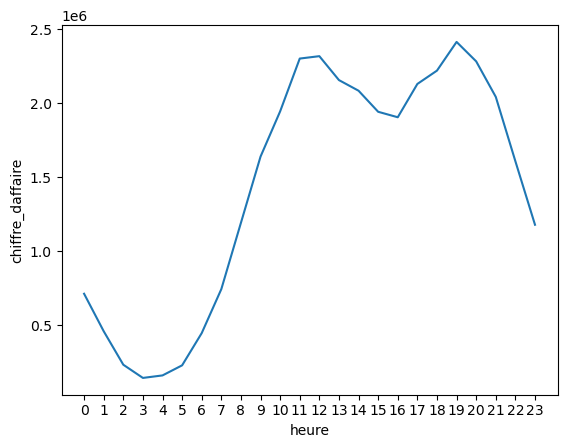

In [82]:
sns.lineplot(data=ca_par_heure['chiffre_daffaire'])
plt.xticks(ticks=range(0, 24))
plt.show()

In [83]:
#Produit le plus vendu

In [84]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


In [85]:
df_clean.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64